Create one file for each person containing selected features and emotion label

In [ ]:
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#load the master file created in step D4
df= pd.read_csv('data/raw_Emotion_pALL_ALLFeat_updated2.csv')
df.head()

In [2]:
#read each person's data at a time
#p=[8, 10, 12, 13, 15, 20, 21, 25, 27, 33, 35, 40, 46, 48, 49, 52, 54, 55]
p=8
one_person_df=df.loc[df['person'] == p]
one_person_df.head()


,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_latitude,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,32.881,-117.234,7,1087,0.000000,8.47,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,32.881,-117.234,8,1088,1.000000,8.47,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,32.881,-117.235,9,1089,1.000000,8.47,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,32.880,-117.235,10,1090,1.016667,8.47,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,32.880,-117.235,11,1091,0.983333,8.47,6.05,55.765343,7.21,2.0


In [3]:
#print list of features
list(one_person_df)

['timestamp',
 'person',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitud

In [4]:
one_person_df.shape[1]

283

In [5]:
#define window size or time interval
window_size=5
new_col=(one_person_df['minute_of_day']//window_size)
new_col
#create a new column #window and assign window value based on the minute_of_day variable
one_person_df.insert(one_person_df.shape[1]-4, column='#window', value=new_col)
one_person_df.head()

,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,#window,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,-117.234,7,1087,0.000000,8.47,217,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,-117.234,8,1088,1.000000,8.47,217,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,-117.235,9,1089,1.000000,8.47,217,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,-117.235,10,1090,1.016667,8.47,218,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,-117.235,11,1091,0.983333,8.47,218,6.05,55.765343,7.21,2.0


In [6]:
#aggregate latitude in 5-minute window
one_person_df.groupby(['day_of_month','#window']).agg({'cl_latitude': "mean"})


cl_latitude
day_of_month #window             
20           217        32.881000
             218        32.879600
             219        32.879000
             220        32.879000
24           20         32.865000
             21         32.865600
             22         32.865500
             226        32.878000
             227        32.876600
             228        32.875200
             229        32.875000
             230        32.875000
             231        32.875000
             232        32.875000
             233        32.875000
             234        32.875000
             235        32.875000
             236        32.875000
             237        32.875000
             238        32.875000
             239        32.875000
             240        32.875000
             241        32.875000
             242        32.875000
             243        32.875000
             244        32.875000
             245        32.875000
             246        32.875800
             247        32.878400
             248        32.878200
...                           ...
25           211        32.878000
             212        32.878000
             213        32.878000
             214        32.878600
             215        32.879400
             216        32.879000
             217        32.879000
             218        32.879000
             219        32.879000
             220        32.879000
             221        32.879000
             222        32.879000
             223        32.879000
             224        32.879000
             225        32.879000
             226        32.879000
             227        32.879000
             228        32.879000
             229        32.879000
             230        32.879000
             231        32.879000
             232        32.879000
             233        32.879000
             234        32.879000
             235        32.879000
             236        32.879000
             237        32.879000
             238        32.879833
             239        32.882400
             240        32.883000

[269 rows x 1 columns]

In [7]:
len(one_person_df.groupby(['day_of_month','#window']))

269

In [8]:
#

In [9]:
one_person_df.head() 

,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,#window,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,-117.234,7,1087,0.000000,8.47,217,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,-117.234,8,1088,1.000000,8.47,217,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,-117.235,9,1089,1.000000,8.47,217,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,-117.235,10,1090,1.016667,8.47,218,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,-117.235,11,1091,0.983333,8.47,218,6.05,55.765343,7.21,2.0


In [10]:
# aggreegate  selected variables to the time interval (window=5 minutes)
# continuous value: mean, binary value: sum
temp_df=one_person_df.groupby(['day_of_month','#window']).agg({'timestamp':"mean", 'raw_acc:magnitude_stats:mean':"mean",'raw_acc:magnitude_stats:std': "mean",\
                                                               'raw_acc:magnitude_stats:moment3':"mean", 'raw_acc:magnitude_stats:percentile25':"mean",\
                                                               'raw_acc:magnitude_stats:percentile50':"mean",'raw_acc:magnitude_stats:percentile75':"mean",\
                                                               'raw_acc:magnitude_spectrum:log_energy_band1':"mean",'raw_acc:magnitude_spectrum:log_energy_band2':"mean",\
                                                               'raw_acc:magnitude_spectrum:log_energy_band3':"mean",\
                                                               'raw_acc:magnitude_autocorrelation:period':"mean",\
                                                               'raw_acc:magnitude_autocorrelation:normalized_ac':"mean",'raw_acc:3d:mean_x':"mean",\
                                                               'raw_acc:3d:mean_y':"mean",'raw_acc:3d:mean_z':"mean",\
                                                               'raw_acc:3d:ro_xy':"mean",'raw_acc:3d:ro_xz':"mean",\
                                                               'raw_acc:3d:ro_yz':"mean",\
                                                               'proc_gyro:magnitude_stats:moment3':"mean",'proc_gyro:magnitude_stats:moment4':"mean",\
                                                               
                                                               'proc_gyro:magnitude_stats:percentile50':"mean",'proc_gyro:magnitude_stats:value_entropy':"mean",\
                                                               
                                                               'proc_gyro:magnitude_spectrum:log_energy_band1':"mean",'proc_gyro:magnitude_spectrum:log_energy_band2':"mean",\
                                                               'proc_gyro:magnitude_spectrum:log_energy_band3':"mean",'proc_gyro:magnitude_spectrum:log_energy_band4':"mean",\
                                                               'proc_gyro:magnitude_spectrum:spectral_entropy':"mean",'proc_gyro:magnitude_autocorrelation:period':"mean",\
                                                               'proc_gyro:magnitude_autocorrelation:normalized_ac':"mean",'proc_gyro:3d:mean_x':"mean",\
                                                               'proc_gyro:3d:mean_y':"mean", 'proc_gyro:3d:mean_z':"mean",'proc_gyro:3d:std_z':"mean",'proc_gyro:3d:ro_xy':"mean",\
                                                               'proc_gyro:3d:ro_xz':"mean",'proc_gyro:3d:ro_yz':"mean",'raw_magnet:magnitude_stats:mean':"mean",'raw_magnet:magnitude_stats:moment4':"mean",\
                                                               'raw_magnet:magnitude_stats:percentile25':"mean",'raw_magnet:magnitude_stats:percentile50':"mean",'raw_magnet:magnitude_stats:percentile75':"mean",\
                                                               'raw_magnet:magnitude_stats:time_entropy':"mean",\
                                                               'raw_magnet:magnitude_spectrum:log_energy_band2':"mean",'raw_magnet:magnitude_spectrum:log_energy_band3':"mean",\
                                                               'raw_magnet:magnitude_spectrum:spectral_entropy':"mean",\
                                                               'raw_magnet:3d:mean_x':"mean",'raw_magnet:3d:mean_y':"mean",'raw_magnet:3d:mean_z':"mean",'raw_magnet:3d:std_x':"mean",\
                                                               'raw_magnet:3d:std_y':"mean",'raw_magnet:3d:std_z':'mean','raw_magnet:3d:ro_xy':'mean','raw_magnet:3d:ro_xz':'mean',\
                                                               'raw_magnet:avr_cosine_similarity_lag_range0':"mean",'raw_magnet:avr_cosine_similarity_lag_range1':"mean",\
                                                               'watch_acceleration:magnitude_stats:mean':"mean",'watch_acceleration:magnitude_stats:moment3':"mean",\
                                                               'watch_acceleration:magnitude_stats:moment4':"mean",'watch_acceleration:magnitude_stats:percentile25':"mean",'watch_acceleration:magnitude_stats:percentile50':"mean",\
                                                               'watch_acceleration:magnitude_stats:percentile75': "mean",'watch_acceleration:magnitude_stats:value_entropy': "mean",\
                                                               'watch_acceleration:magnitude_stats:time_entropy':"mean",'watch_acceleration:magnitude_spectrum:log_energy_band0': "mean",\
                                                               'watch_acceleration:magnitude_spectrum:log_energy_band1': "mean",'watch_acceleration:magnitude_spectrum:log_energy_band2': "mean",'watch_acceleration:magnitude_spectrum:log_energy_band3': "mean",\
                                                               'watch_acceleration:magnitude_spectrum:log_energy_band4': "mean",'watch_acceleration:3d:mean_x': "mean",\
                                                               'watch_acceleration:3d:mean_y': "mean",'watch_acceleration:3d:mean_z': "mean",\
                                                               'watch_acceleration:3d:std_z': "mean",'watch_acceleration:3d:ro_xy': "mean",\
                                                               'watch_acceleration:spectrum:x_log_energy_band0': "mean",\
                                                               'watch_acceleration:spectrum:x_log_energy_band2': "mean",\
                                                               'watch_acceleration:spectrum:x_log_energy_band3': "mean",'watch_acceleration:spectrum:x_log_energy_band4': "mean",\
                                                               'watch_acceleration:spectrum:y_log_energy_band1': "mean",'watch_acceleration:spectrum:y_log_energy_band2': "mean",\
                                                               'watch_acceleration:spectrum:y_log_energy_band4': "mean",\
                                                               'watch_acceleration:spectrum:z_log_energy_band0': "mean",'watch_acceleration:spectrum:z_log_energy_band1': "mean",\
                                                               'watch_acceleration:spectrum:z_log_energy_band2': "mean",\
                                                               'watch_acceleration:spectrum:z_log_energy_band4': "mean",'watch_acceleration:relative_directions:avr_cosine_similarity_lag_range0': "mean",'watch_acceleration:relative_directions:avr_cosine_similarity_lag_range1': "mean",\
                                                               'watch_acceleration:relative_directions:avr_cosine_similarity_lag_range2': "mean",'watch_acceleration:relative_directions:avr_cosine_similarity_lag_range3': "mean",'watch_acceleration:relative_directions:avr_cosine_similarity_lag_range4': "mean",\
                                                               'watch_heading:mean_cos': "mean",'watch_heading:std_cos': "mean",'watch_heading:mom3_cos': "mean",\
                                                               'watch_heading:mom4_cos': "mean",'watch_heading:mean_sin': "mean",'watch_heading:std_sin': "mean",\
                                                               'watch_heading:mom3_sin': "mean",'watch_heading:mom4_sin': "mean",'watch_heading:entropy_8bins': "mean",'location:num_valid_updates': "mean",\
                                                               'location:log_longitude_range': "mean",'location:min_altitude': "mean",\
                                                               'location:max_altitude': "mean",'location:min_speed': "mean",\
                                                               'location:best_horizontal_accuracy': "mean",'location:best_vertical_accuracy': "mean",\
                                                               'location:diameter': "mean",'location:log_diameter': "mean",'location_quick_features:std_lat': "mean",'location_quick_features:std_long': "mean",\
                                                               'location_quick_features:lat_change': "mean",'location_quick_features:mean_abs_lat_deriv': "mean",\
                                                               'audio_naive:mfcc0:mean': "mean",'audio_naive:mfcc1:mean': "mean",\
                                                               'audio_naive:mfcc2:mean': "mean",'audio_naive:mfcc3:mean': "mean",'audio_naive:mfcc4:mean': "mean",\
                                                               'audio_naive:mfcc5:mean': "mean",'audio_naive:mfcc6:std': "mean",'audio_naive:mfcc7:mean': "mean",'audio_naive:mfcc8:mean': "mean",\
                                                               'audio_naive:mfcc9:mean': "mean",'audio_naive:mfcc10:mean': "mean",'audio_naive:mfcc11:mean': "mean",'audio_naive:mfcc12:mean': "mean",\
                                                               'audio_naive:mfcc0:std': "mean",'audio_naive:mfcc1:std': "mean",'audio_naive:mfcc2:std': "mean",'audio_naive:mfcc3:std': "mean",\
                                                               'audio_naive:mfcc4:std': "mean",'audio_naive:mfcc5:std': "mean",'audio_naive:mfcc6:std': "mean",'audio_naive:mfcc7:std': "mean",\
                                                               'audio_naive:mfcc8:std': "mean",'audio_naive:mfcc9:std': "mean",'audio_naive:mfcc10:std': "mean",'audio_naive:mfcc11:std': "mean",'audio_naive:mfcc12:std': "mean",\
                                                               'audio_properties:max_abs_value': "mean",'audio_properties:normalization_multiplier': "mean",\
                                                               'discrete:battery_plugged:is_ac': "sum",\
                                                               
                                                               'discrete:battery_plugged:missing':"sum",'discrete:battery_state:is_unplugged':"sum",\
                                                               'discrete:battery_state:is_discharging':"sum",'discrete:battery_state:is_charging':"sum",\
                                                               
                                                               'discrete:ringer_mode:is_normal':"sum",\
                                                               'discrete:ringer_mode:is_silent_with_vibrate':"sum",\
                                                               'discrete:wifi_status:is_not_reachable':'sum','discrete:wifi_status:is_reachable_via_wifi':'sum',\
                                                               'lf_measurements:light':"mean",'lf_measurements:pressure':"mean",'lf_measurements:proximity_cm':"mean",\
                                                               'lf_measurements:relative_humidity':"mean",'lf_measurements:battery_level':"mean",'lf_measurements:screen_brightness':"mean", 'lf_measurements:temperature_ambient':"mean",\
                                                               'label:LYING_DOWN': 'sum','label:SITTING': 'sum','label:FIX_walking': 'sum','label:FIX_running': 'sum','label:BICYCLING': 'sum','label:SLEEPING': 'sum','label:IN_CLASS': 'sum',\
                                                               'label:IN_A_MEETING': 'sum','label:LOC_main_workplace': 'sum','label:OR_indoors': 'sum','label:OR_outside': 'sum','label:IN_A_CAR': 'sum',\
                                                               'label:DRIVE_-_I_M_A_PASSENGER': 'sum','label:LOC_home': 'sum','label:PHONE_IN_POCKET': 'sum','label:OR_exercise': 'sum','label:COOKING': 'sum',\
                                                               'label:SHOPPING': 'sum', 'label:BATHING_-_SHOWER': 'sum','label:CLEANING': 'sum','label:DOING_LAUNDRY': 'sum','label:WATCHING_TV': 'sum',\
                                                               'label:SURFING_THE_INTERNET': 'sum','label:TALKING': 'sum','label:COMPUTER_WORK': 'sum','label:EATING': 'sum',\
                                                               'label:TOILET': 'sum','label:GROOMING': 'sum','label:DRESSING': 'sum','label:STAIRS_-_GOING_UP': 'sum','label:STAIRS_-_GOING_DOWN': 'sum','label:OR_standing': 'sum',\
                                                               'label:AT_SCHOOL': 'sum','label:PHONE_IN_HAND': 'sum','label:PHONE_IN_BAG': 'sum','label:PHONE_ON_TABLE': 'sum','label:WITH_CO-WORKERS': 'sum','label:WITH_FRIENDS': 'sum',\
                                                               'hour_of_timestamp': "mean", 'day_of_timestamp':"max", 'day_of_month':"max", 'geo_dist': "mean", 'cl_latitude': "mean", 'cl_longitude': "mean", 'pleasant_score': "mean", 'arousal_score': "mean",'dominance_score': "mean"})

In [11]:
temp_df

timestamp  raw_acc:magnitude_stats:mean  \
day_of_month #window                                               
20           217      1.440094e+09                      1.019683   
             218      1.440094e+09                      1.093562   
             219      1.440095e+09                      1.025258   
             220      1.440095e+09                      1.005540   
24           20       1.440381e+09                      1.024582   
             21       1.440381e+09                      1.030178   
             22       1.440381e+09                      1.020069   
             226      1.440442e+09                      1.066504   
             227      1.440443e+09                      1.097777   
             228      1.440443e+09                      1.051386   
             229      1.440443e+09                      1.008782   
             230      1.440444e+09                      1.007277   
             231      1.440444e+09                      1.009898   
             232      1.440444e+09                      1.009058   
             233      1.440444e+09                      1.005128   
             234      1.440445e+09                      1.002669   
             235      1.440445e+09                      1.003176   
             236      1.440445e+09                      1.005738   
             237      1.440446e+09                      1.007669   
             238      1.440446e+09                      1.003017   
             239      1.440446e+09                      0.997965   
             240      1.440447e+09                      0.998027   
             241      1.440447e+09                      1.017957   
             242      1.440447e+09                      1.005388   
             243      1.440447e+09                      1.001537   
             244      1.440448e+09                      0.991654   
             245      1.440448e+09                      0.986210   
             246      1.440448e+09                      1.068145   
             247      1.440449e+09                      1.125525   
             248      1.440449e+09                      1.142975   
...                            ...                           ...   
25           211      1.440524e+09                      0.989023   
             212      1.440525e+09                      0.987107   
             213      1.440525e+09                      0.986350   
             214      1.440525e+09                      1.026269   
             215      1.440525e+09                      1.072930   
             216      1.440526e+09                      1.007863   
             217      1.440526e+09                      0.991879   
             218      1.440526e+09                      0.991552   
             219      1.440527e+09                      0.993293   
             220      1.440527e+09                      0.997319   
             221      1.440527e+09                      0.992072   
             222      1.440528e+09                      0.991150   
             223      1.440528e+09                      0.992004   
             224      1.440528e+09                      1.007631   
             225      1.440528e+09                      1.008652   
             226      1.440529e+09                      1.010093   
             227      1.440529e+09                      1.002630   
             228      1.440529e+09                      0.991839   
             229      1.440530e+09                      1.004996   
             230      1.440530e+09                      0.993643   
             231      1.440530e+09                      0.990900   
             232      1.440531e+09                      0.990362   
             233      1.440531e+09                      0.989823   
             234      1.440531e+09                      0.991741   
             235      1.440531e+09                      0.991404   
             236      1.440532e+09                      0.990345   
             

In [12]:
a=one_person_df.groupby(['day_of_month','#window']).size().unstack(fill_value=0)

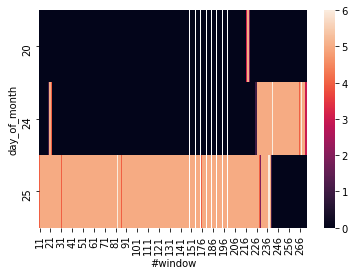

In [13]:
#visualize heatmap of present and missing windows
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(a, linewidth=0.0001)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()

In [14]:
one_person_df.head()

,timestamp,person,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,...,cl_longitude,minute_of_hour,minute_of_day,time_diff_in_minute,pleasant_score,#window,arousal_score,geo_dist,dominance_score,emotion
0,1.440094e+09,8,1.001473,0.126916,0.209004,0.333994,0.956588,0.992468,1.033735,1.399579,...,-117.234,7,1087,0.000000,8.47,217,6.05,0.000000,7.21,2.0
1,1.440094e+09,8,1.020985,0.211577,0.189190,0.312424,0.875169,1.003510,1.153094,2.234364,...,-117.234,8,1088,1.000000,8.47,217,6.05,5.040893,7.21,2.0
2,1.440094e+09,8,1.036591,0.285806,-0.132830,0.343141,0.788695,1.072480,1.272836,2.705906,...,-117.235,9,1089,1.000000,8.47,217,6.05,65.809210,7.21,2.0
3,1.440094e+09,8,1.076537,0.265645,0.142064,0.322576,0.854440,1.071343,1.288627,2.813417,...,-117.235,10,1090,1.016667,8.47,218,6.05,40.436150,7.21,2.0
4,1.440094e+09,8,1.152467,0.350221,0.292778,0.439607,0.857681,1.070274,1.418371,2.739190,...,-117.235,11,1091,0.983333,8.47,218,6.05,55.765343,7.21,2.0


In [15]:
temp_df.shape

(269, 201)

In [16]:
# calulate the motion as the mode of all emotion values within the same window
from scipy.stats import mode

temp_df['emotion']=one_person_df.groupby(['day_of_month','#window'])['emotion'].agg(lambda x:pd.Series.mode(x)[0])


In [17]:

list(temp_df)

['timestamp',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:moment3',
 'proc_gyro:magnitude_stats:moment4',
 'proc_gyro:magnitude_stats:percentile50',
 'proc_gyro:magnitude_stats:value_entropy',
 'proc_gyro:magnitude_spectrum:log_energy_band1',
 'proc_gyro:magnitude_spectrum:log_energy_band2',
 'proc_gyro:magnitude_spectrum:log_energy_band3',
 'proc_gyro:magnitude_spectrum:log_energy_band4',
 'proc_gyro:magnitude_spectru

In [18]:
temp_df.shape

(269, 202)

In [19]:
print(temp_df.groupby('emotion').size())

emotion
1.0     40
2.0     15
3.0    162
6.0     52
dtype: int64


In [20]:
temp_df.head()

timestamp  raw_acc:magnitude_stats:mean  \
day_of_month #window                                               
20           217      1.440094e+09                      1.019683   
             218      1.440094e+09                      1.093562   
             219      1.440095e+09                      1.025258   
             220      1.440095e+09                      1.005540   
24           20       1.440381e+09                      1.024582   

                      raw_acc:magnitude_stats:std  \
day_of_month #window                                
20           217                         0.208100   
             218                         0.300236   
             219                         0.168070   
             220                         0.074641   
24           20                          0.190395   

                      raw_acc:magnitude_stats:moment3  \
day_of_month #window                                    
20           217                             0.088455   
             218                             0.205309   
             219                             0.227730   
             220                             0.097187   
24           20                              0.179144   

                      raw_acc:magnitude_stats:percentile25  \
day_of_month #window                                         
20           217                                  0.873484   
             218                                  0.857378   
             219                                  0.956374   
             220                                  0.987591   
24           20                                   0.928229   

                      raw_acc:magnitude_stats:percentile50  \
day_of_month #window                                         
20           217                                  1.022819   
             218                                  1.063638   
             219                                  1.010832   
             220                                  0.998488   
24           20                                   0.998126   

                      raw_acc:magnitude_stats:percentile75  \
day_of_month #window                                         
20           217                                  1.153222   
             218                                  1.312268   
             219                                  1.074479   
             220                                  1.011220   
24           20                                   1.114429   

                      raw_acc:magnitude_spectrum:log_energy_band1  \
day_of_month #window                                                
20           217                                         0.468006   
             218                                         0.860350   
             219                                         0.608588   
             220                                         0.097474   
24           20                                          0.094596   

                      raw_acc:magnitude_spectrum:log_energy_band2  \
day_of_month #window                                                
20           217                                         2.679848   
             218                                         3.469182   
             219                                         1.469505   
             220                                         0.601399   
24           20                                          2.130435   

                      raw_acc:magnitude_spectrum:log_energy_band3  ...  \
day_of_month #window                                               ...   
20           217                                         1.444744  ...   
             218                                         1.702275  ...   
             219                                         0.990092  ...   
             220                                         0.340052  ...   
24           20                                          1.

In [21]:
temp_df.shape

(269, 202)

In [22]:
#drop all variables that contain all NANs
temp_df.dropna(axis=1,how='all', inplace=True)

In [23]:
temp_df.shape

(269, 197)

In [24]:
#reset the index
temp_df.reset_index(drop=True, inplace=True)

In [26]:
temp_df.shape

(269, 197)

In [27]:
temp_df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,...,hour_of_timestamp,day_of_timestamp,day_of_month,geo_dist,cl_latitude,cl_longitude,pleasant_score,arousal_score,dominance_score,emotion
0,1.440094e+09,1.019683,0.208100,0.088455,0.873484,1.022819,1.153222,0.468006,2.679848,1.444744,...,18,3,20,23.616701,32.8810,-117.234333,8.470,6.050,7.210,2.0
1,1.440094e+09,1.093562,0.300236,0.205309,0.857378,1.063638,1.312268,0.860350,3.469182,1.702275,...,18,3,20,73.230956,32.8796,-117.233800,8.470,6.050,7.210,2.0
2,1.440095e+09,1.025258,0.168070,0.227730,0.956374,1.010832,1.074479,0.608588,1.469505,0.990092,...,18,3,20,14.259258,32.8790,-117.232000,8.470,6.050,7.210,2.0
3,1.440095e+09,1.005540,0.074641,0.097187,0.987591,0.998488,1.011220,0.097474,0.601399,0.340052,...,18,3,20,20.064404,32.8790,-117.232000,8.470,6.050,7.210,2.0
4,1.440381e+09,1.024582,0.190395,0.179144,0.928229,0.998126,1.114429,0.094596,2.130435,1.162463,...,1,0,24,697.187101,32.8650,-117.233000,8.235,5.705,6.565,2.0


In [28]:
# list all variables
list(temp_df)

['timestamp',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:moment3',
 'proc_gyro:magnitude_stats:moment4',
 'proc_gyro:magnitude_stats:percentile50',
 'proc_gyro:magnitude_stats:value_entropy',
 'proc_gyro:magnitude_spectrum:log_energy_band1',
 'proc_gyro:magnitude_spectrum:log_energy_band2',
 'proc_gyro:magnitude_spectrum:log_energy_band3',
 'proc_gyro:magnitude_spectrum:log_energy_band4',
 'proc_gyro:magnitude_spectru

In [29]:
#drop columns with all zeros in pandas dataframe
temp_df=temp_df.T[(temp_df!=0).any()].T

In [30]:
list(temp_df)

['timestamp',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:moment3',
 'proc_gyro:magnitude_stats:moment4',
 'proc_gyro:magnitude_stats:percentile50',
 'proc_gyro:magnitude_stats:value_entropy',
 'proc_gyro:magnitude_spectrum:log_energy_band1',
 'proc_gyro:magnitude_spectrum:log_energy_band2',
 'proc_gyro:magnitude_spectrum:log_energy_band3',
 'proc_gyro:magnitude_spectrum:log_energy_band4',
 'proc_gyro:magnitude_spectru

In [31]:
temp_df.shape

(269, 171)

In [32]:
temp_df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,...,hour_of_timestamp,day_of_timestamp,day_of_month,geo_dist,cl_latitude,cl_longitude,pleasant_score,arousal_score,dominance_score,emotion
0,1.440094e+09,1.019683,0.208100,0.088455,0.873484,1.022819,1.153222,0.468006,2.679848,1.444744,...,18.0,3.0,20.0,23.616701,32.8810,-117.234333,8.470,6.050,7.210,2.0
1,1.440094e+09,1.093562,0.300236,0.205309,0.857378,1.063638,1.312268,0.860350,3.469182,1.702275,...,18.0,3.0,20.0,73.230956,32.8796,-117.233800,8.470,6.050,7.210,2.0
2,1.440095e+09,1.025258,0.168070,0.227730,0.956374,1.010832,1.074479,0.608588,1.469505,0.990092,...,18.0,3.0,20.0,14.259258,32.8790,-117.232000,8.470,6.050,7.210,2.0
3,1.440095e+09,1.005540,0.074641,0.097187,0.987591,0.998488,1.011220,0.097474,0.601399,0.340052,...,18.0,3.0,20.0,20.064404,32.8790,-117.232000,8.470,6.050,7.210,2.0
4,1.440381e+09,1.024582,0.190395,0.179144,0.928229,0.998126,1.114429,0.094596,2.130435,1.162463,...,1.0,0.0,24.0,697.187101,32.8650,-117.233000,8.235,5.705,6.565,2.0


In [33]:
# drop emotional score variables, day of month, and timestapms 
temp_df.drop(['pleasant_score', 'arousal_score','dominance_score', 'day_of_month','timestamp'], axis=1, inplace=True)

In [34]:
temp_df.shape

(269, 166)

In [35]:
list(temp_df)

['raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'proc_gyro:magnitude_stats:moment3',
 'proc_gyro:magnitude_stats:moment4',
 'proc_gyro:magnitude_stats:percentile50',
 'proc_gyro:magnitude_stats:value_entropy',
 'proc_gyro:magnitude_spectrum:log_energy_band1',
 'proc_gyro:magnitude_spectrum:log_energy_band2',
 'proc_gyro:magnitude_spectrum:log_energy_band3',
 'proc_gyro:magnitude_spectrum:log_energy_band4',
 'proc_gyro:magnitude_spectrum:spectral_ent

In [37]:
#save the file for each person
temp_df.to_csv('data/NOv_w5_emotionLabel_SelFeat_p'+str(p)+'.csv', index=False)